In [ ]:
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Clothing_Shoes_and_Jewelry.csv

--2022-12-25 07:36:18--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Clothing_Shoes_and_Jewelry.csv
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 1347817661 (1.3G) [text/csv]
Saving to: ‘Clothing_Shoes_and_Jewelry.csv’

Clothing_Shoes_and_ 100%[===================>]   1.25G  44.2MB/s    in 30s     

2022-12-25 07:36:48 (43.3 MB/s) - ‘Clothing_Shoes_and_Jewelry.csv’ saved [1347817661/1347817661]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
ratings = pd.read_csv('/content/Clothing_Shoes_and_Jewelry.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
ratings

,asin,reviewerID,overall,unixReviewTime
0,0871167042,A2IC3NZN488KWK,5.0,1399161600
1,0871167042,A3OT9BYASFGU2X,4.0,1398470400
2,0871167042,A28GK1G2KDXHRP,5.0,1397692800
3,0871167042,A3NFXFEKW8OK0E,5.0,1397606400
4,0871167042,A3I6G5TKBVJEK9,5.0,1397520000
...,...,...,...,...
32292094,B01HJHMQW6,A2ATY4H4A3RK05,5.0,1482710400
32292095,B01HJHA4W0,ACNWGCHFOPZ3N,3.0,1497830400
32292096,B01HJI0G5Y,A1R7H90HCU8WJK,3.0,1510704000
32292097,B01HJI0G5Y,A3VZ29X7SM3L09,5.0,1500768000


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32292099 entries, 0 to 32292098
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   asin            object 
 1   reviewerID      object 
 2   overall         float64
 3   unixReviewTime  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 985.5+ MB


In [ ]:
ratings.isnull().sum()

asin              0
reviewerID        0
overall           0
unixReviewTime    0
dtype: int64

In [ ]:
ratings.duplicated().value_counts()                     # rating has 594135 of 31697964 duplicated 

False    31697964
True       594135
dtype: int64

In [ ]:
ratings[ratings.duplicated(keep=False)].sort_values(by=['reviewerID', 'asin', 'unixReviewTime']).head(10)

,asin,reviewerID,overall,unixReviewTime
1880820,B0012G297S,A0010876CNE3ILIM9HV0,3.0,1386547200
2438267,B0012G297S,A0010876CNE3ILIM9HV0,3.0,1386547200
1894792,B0012M0XZ2,A0020234S9919TJR2GK2,2.0,1478131200
2452239,B0012M0XZ2,A0020234S9919TJR2GK2,2.0,1478131200
1648203,B000WMVY0G,A0030494N5HM5N3XU8BO,5.0,1486857600
2205650,B000WMVY0G,A0030494N5HM5N3XU8BO,5.0,1486857600
1859565,B00125RVAY,A0041412R4QO0GBGB6R5,5.0,1389052800
2417012,B00125RVAY,A0041412R4QO0GBGB6R5,5.0,1389052800
1937523,B00134OJYA,A0045376WILGSAHZF1FJ,5.0,1376524800
2494970,B00134OJYA,A0045376WILGSAHZF1FJ,5.0,1376524800


In [ ]:
ratings.drop_duplicates(inplace=True)

In [ ]:
ratings['reviewDate'] = pd.to_datetime(ratings['unixReviewTime'], unit="s")
ratings

,asin,reviewerID,overall,unixReviewTime,reviewDate
0,0871167042,A2IC3NZN488KWK,5.0,1399161600,2014-05-04
1,0871167042,A3OT9BYASFGU2X,4.0,1398470400,2014-04-26
2,0871167042,A28GK1G2KDXHRP,5.0,1397692800,2014-04-17
3,0871167042,A3NFXFEKW8OK0E,5.0,1397606400,2014-04-16
4,0871167042,A3I6G5TKBVJEK9,5.0,1397520000,2014-04-15
...,...,...,...,...,...
32292094,B01HJHMQW6,A2ATY4H4A3RK05,5.0,1482710400,2016-12-26
32292095,B01HJHA4W0,ACNWGCHFOPZ3N,3.0,1497830400,2017-06-19
32292096,B01HJI0G5Y,A1R7H90HCU8WJK,3.0,1510704000,2017-11-15
32292097,B01HJI0G5Y,A3VZ29X7SM3L09,5.0,1500768000,2017-07-23


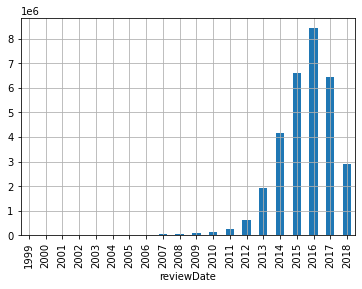

In [ ]:
ratings.groupby(ratings['reviewDate'].dt.year).count()['overall'].plot(kind="bar", grid=True)

In [ ]:
OLD_REVIEW_YEAR_THRESHOLD = 2015

old_reviews = ratings[pd.DatetimeIndex(ratings['reviewDate']).year < OLD_REVIEW_YEAR_THRESHOLD]
old_reviews.head()

,asin,reviewerID,overall,unixReviewTime,reviewDate
0,0871167042,A2IC3NZN488KWK,5.0,1399161600,2014-05-04
1,0871167042,A3OT9BYASFGU2X,4.0,1398470400,2014-04-26
2,0871167042,A28GK1G2KDXHRP,5.0,1397692800,2014-04-17
3,0871167042,A3NFXFEKW8OK0E,5.0,1397606400,2014-04-16
4,0871167042,A3I6G5TKBVJEK9,5.0,1397520000,2014-04-15


In [ ]:
ratings = ratings[pd.DatetimeIndex(ratings['reviewDate']).year >= OLD_REVIEW_YEAR_THRESHOLD]
ratings

,asin,reviewerID,overall,unixReviewTime,reviewDate
10,0871167042,A2G9GWQEWWNQUB,5.0,1432944000,2015-05-30
11,0871167042,A3RGH15H17SM1Z,4.0,1430956800,2015-05-07
12,0871167042,A20QJNRKLJVP1E,3.0,1428019200,2015-04-03
13,0871167042,A1G26EYQGW3YF1,5.0,1427414400,2015-03-27
14,0871167042,A2JGAZF2Y2BDU6,4.0,1426464000,2015-03-16
...,...,...,...,...,...
32292094,B01HJHMQW6,A2ATY4H4A3RK05,5.0,1482710400,2016-12-26
32292095,B01HJHA4W0,ACNWGCHFOPZ3N,3.0,1497830400,2017-06-19
32292096,B01HJI0G5Y,A1R7H90HCU8WJK,3.0,1510704000,2017-11-15
32292097,B01HJI0G5Y,A3VZ29X7SM3L09,5.0,1500768000,2017-07-23


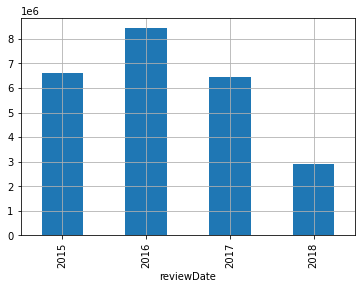

In [ ]:
ratings.groupby(ratings['reviewDate'].dt.year).count()['overall'].plot(kind="bar", grid=True)

In [ ]:
ratings['overall'].value_counts()

5.0    14864968
4.0     4187512
3.0     2224995
1.0     1781318
2.0     1351090
Name: overall, dtype: int64

(array([ 1781318.,  1351090.,  2224995.,  4187512., 14864968.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

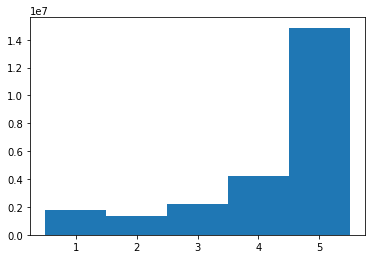

In [ ]:
plt.hist(ratings['overall'], bins=np.arange(1, 7), align='left')

In [ ]:
items_avg_overall = ratings.groupby('asin')['overall'].mean()
items_avg_overall.sort_values()

asin
B010LNR5C6    1.0
B004KKY5O8    1.0
B00GOVSB78    1.0
B00EICAFC4    1.0
B00YHCMENS    1.0
             ... 
B00X4LKQA6    5.0
B00X4LNWDO    5.0
B00CQ8QV3Y    5.0
B00X4LCVOA    5.0
B00PIUTQZC    5.0
Name: overall, Length: 2082506, dtype: float64

In [ ]:
items_reviews_count = ratings['asin'].value_counts()
items_reviews_count

B00OD9JH6W    9370
B00IYAG7DW    9194
B00V3MYAZA    8683
B00SU5244M    8556
B00SU52460    8556
              ... 
B00ZL3EV2Y       1
B00ZLMLRFO       1
B00FT5E0WU       1
B00MJA42X0       1
B00N0LSFDU       1
Name: asin, Length: 2082506, dtype: int64

In [ ]:
items_reviews_count[items_reviews_count>25]

B00OD9JH6W    9370
B00IYAG7DW    9194
B00V3MYAZA    8683
B00SU5244M    8556
B00SU52460    8556
              ... 
B00SSXN1PW      26
B01HDNAHR2      26
B00MTYI4NU      26
B00UFAM6PW      26
B000TH4R6W      26
Name: asin, Length: 143921, dtype: int64

In [ ]:
RATINGS_CONFEDNECE_THRESHOLD = 25
less_confidance_products = items_reviews_count[items_reviews_count < RATINGS_CONFEDNECE_THRESHOLD].index
less_confidance_reviews = ratings[ratings['asin'].isin(less_confidance_products)]
less_confidance_reviews

,asin,reviewerID,overall,unixReviewTime,reviewDate
10,0871167042,A2G9GWQEWWNQUB,5.0,1432944000,2015-05-30
11,0871167042,A3RGH15H17SM1Z,4.0,1430956800,2015-05-07
12,0871167042,A20QJNRKLJVP1E,3.0,1428019200,2015-04-03
13,0871167042,A1G26EYQGW3YF1,5.0,1427414400,2015-03-27
14,0871167042,A2JGAZF2Y2BDU6,4.0,1426464000,2015-03-16
...,...,...,...,...,...
32292094,B01HJHMQW6,A2ATY4H4A3RK05,5.0,1482710400,2016-12-26
32292095,B01HJHA4W0,ACNWGCHFOPZ3N,3.0,1497830400,2017-06-19
32292096,B01HJI0G5Y,A1R7H90HCU8WJK,3.0,1510704000,2017-11-15
32292097,B01HJI0G5Y,A3VZ29X7SM3L09,5.0,1500768000,2017-07-23


In [ ]:
ratings = ratings[~ratings['asin'].isin(less_confidance_products)]
ratings

,asin,reviewerID,overall,unixReviewTime,reviewDate
30,1519588135,A16DSXRAN5QK94,5.0,1449964800,2015-12-13
31,1519588135,A3GWE80SUGORJD,3.0,1449964800,2015-12-13
32,1519588135,A2NLY1TJ8TYV6D,4.0,1449878400,2015-12-12
33,1519588135,A2GU5SHR2DC29H,5.0,1449878400,2015-12-12
34,1519588135,A2FHBHNKHRDS72,4.0,1449446400,2015-12-07
...,...,...,...,...,...
32292058,B01HJHFS58,A2XWXUEDCTIW1G,4.0,1531180800,2018-07-10
32292059,B01HJHFS58,A1I8XIC4B8JFPU,3.0,1530835200,2018-07-06
32292060,B01HJHFS58,A47KFHYE0I8YL,5.0,1530489600,2018-07-02
32292061,B01HJHFS58,AKMG2IZDJO2PQ,5.0,1530489600,2018-07-02


In [ ]:
unique_items = ratings['asin'].unique()
len(unique_items)

148766

In [ ]:
ratings['overall'].value_counts()

5.0    10848188
4.0     3088320
3.0     1599533
1.0     1228461
2.0      968031
Name: overall, dtype: int64

(array([ 1228461.,   968031.,  1599533.,  3088320., 10848188.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

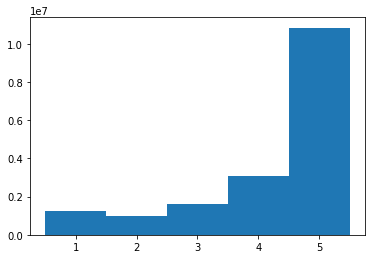

In [ ]:
plt.hist(ratings['overall'], bins=np.arange(1, 7), align='left')

In [ ]:
items_unique_ratings = ratings.groupby('asin')['overall'].unique()
single_rating_items = items_unique_ratings[items_unique_ratings.agg(len) == 1]
print(len(single_rating_items))
single_rating_items

44


asin
B00174EKUE    [5.0]
B004QWYZ2W    [5.0]
B004TDTYBK    [5.0]
B0058ZTF0I    [5.0]
B0067ND5W4    [5.0]
B00AKG6Q8E    [5.0]
B00BJGE1IG    [5.0]
B00C0AKQ6Q    [5.0]
B00CCJ35E0    [5.0]
B00DC26HJQ    [5.0]
B00FN2JYHU    [5.0]
B00GTSHRQ2    [5.0]
B00IACCSM8    [5.0]
B00ICT29R8    [5.0]
B00IPNZFOA    [5.0]
B00IU18EJK    [5.0]
B00IWOO2Y6    [5.0]
B00IXX5VJQ    [5.0]
B00IYC2USQ    [5.0]
B00KL9I89U    [5.0]
B00KNSIH3Q    [5.0]
B00LXGT998    [5.0]
B00MX9TBQA    [5.0]
B00PWYJ618    [5.0]
B00QXEK5WA    [5.0]
B00RY7VH9K    [5.0]
B00SWA8SMC    [5.0]
B00VFSREKU    [5.0]
B00VU6OY64    [5.0]
B00WRDQ3T0    [5.0]
B00XEN3O30    [5.0]
B00Z8JJWAM    [5.0]
B011MNPJMW    [5.0]
B011PXZAMS    [5.0]
B015M8QB02    [5.0]
B018MEP1B8    [5.0]
B0194OYF62    [5.0]
B019WEQ954    [5.0]
B01AWZ917A    [5.0]
B01D0QMCDI    [5.0]
B01DLTRP2W    [5.0]
B01F47N9BU    [5.0]
B01FIY7P7S    [5.0]
B01GK6G20E    [5.0]
Name: overall, dtype: object

In [ ]:
single_ratings_items_count = ratings[ratings['asin'].isin(
    single_rating_items.index)].groupby('asin')['overall'].agg('count')

single_ratings_items_count

asin
B00174EKUE     28
B004QWYZ2W     26
B004TDTYBK     28
B0058ZTF0I     26
B0067ND5W4     25
B00AKG6Q8E     35
B00BJGE1IG     26
B00C0AKQ6Q     27
B00CCJ35E0     25
B00DC26HJQ     79
B00FN2JYHU     27
B00GTSHRQ2     25
B00IACCSM8     28
B00ICT29R8     27
B00IPNZFOA     25
B00IU18EJK     29
B00IWOO2Y6     27
B00IXX5VJQ     28
B00IYC2USQ     30
B00KL9I89U     30
B00KNSIH3Q     25
B00LXGT998     29
B00MX9TBQA     26
B00PWYJ618     26
B00QXEK5WA    169
B00RY7VH9K     29
B00SWA8SMC     29
B00VFSREKU     28
B00VU6OY64     25
B00WRDQ3T0     41
B00XEN3O30     28
B00Z8JJWAM     32
B011MNPJMW     46
B011PXZAMS     33
B015M8QB02     32
B018MEP1B8     29
B0194OYF62     28
B019WEQ954     35
B01AWZ917A     30
B01D0QMCDI     30
B01DLTRP2W     28
B01F47N9BU     31
B01FIY7P7S     35
B01GK6G20E     33
Name: overall, dtype: int64

In [ ]:
SINGLE_RATING_CONFEDNECE_THRESHOLD = 100
less_confidance_single_ratings_items = single_ratings_items_count[single_ratings_items_count < SINGLE_RATING_CONFEDNECE_THRESHOLD].index
less_confidance_single_ratings_reviews = ratings[ratings['asin'].isin(less_confidance_single_ratings_items)]
less_confidance_single_ratings_reviews

,asin,reviewerID,overall,unixReviewTime,reviewDate
2095073,B00174EKUE,A26UDBAGC9VKTB,5.0,1468540800,2016-07-15
2095074,B00174EKUE,A22TH6N6W9FF3E,5.0,1467072000,2016-06-28
2095075,B00174EKUE,A1QO9ZU7LYVAED,5.0,1464480000,2016-05-29
2095076,B00174EKUE,A2DH8RXZ4GDZEV,5.0,1458604800,2016-03-22
2095077,B00174EKUE,A2DDOKAEJH43KM,5.0,1454803200,2016-02-07
...,...,...,...,...,...
32153796,B01GK6G20E,A2OQ1LIE0EKQIB,5.0,1522454400,2018-03-31
32153797,B01GK6G20E,AJWWSA9QM6207,5.0,1515542400,2018-01-10
32153798,B01GK6G20E,A3QJPBXSPA20DP,5.0,1514419200,2017-12-28
32153799,B01GK6G20E,A2E7FQEE511DKH,5.0,1508371200,2017-10-19


In [ ]:
ratings = ratings[~ratings['asin'].isin(less_confidance_single_ratings_items)]
ratings

,asin,reviewerID,overall,unixReviewTime,reviewDate
30,1519588135,A16DSXRAN5QK94,5.0,1449964800,2015-12-13
31,1519588135,A3GWE80SUGORJD,3.0,1449964800,2015-12-13
32,1519588135,A2NLY1TJ8TYV6D,4.0,1449878400,2015-12-12
33,1519588135,A2GU5SHR2DC29H,5.0,1449878400,2015-12-12
34,1519588135,A2FHBHNKHRDS72,4.0,1449446400,2015-12-07
...,...,...,...,...,...
32292058,B01HJHFS58,A2XWXUEDCTIW1G,4.0,1531180800,2018-07-10
32292059,B01HJHFS58,A1I8XIC4B8JFPU,3.0,1530835200,2018-07-06
32292060,B01HJHFS58,A47KFHYE0I8YL,5.0,1530489600,2018-07-02
32292061,B01HJHFS58,AKMG2IZDJO2PQ,5.0,1530489600,2018-07-02


In [ ]:
two_rating_items = items_unique_ratings[items_unique_ratings.agg(len) == 2]
two_rating_items

asin
B0000E0HNP    [5.0, 4.0]
B0009WH0FC    [5.0, 4.0]
B000BB7UBK    [4.0, 5.0]
B000CNF3U2    [5.0, 4.0]
B000EY5CF0    [5.0, 3.0]
                 ...    
B01HEBVAYC    [5.0, 4.0]
B01HGGVC3O    [5.0, 4.0]
B01HHJZJ7U    [5.0, 4.0]
B01HHS4F80    [5.0, 4.0]
B01HIATBZO    [5.0, 4.0]
Name: overall, Length: 1279, dtype: object

In [ ]:
two_ratings_items_count = ratings[ratings['asin'].isin(
    two_rating_items.index)].groupby('asin')['overall'].agg('count')

two_ratings_items_count.sort_values()

asin
B0000E0HNP     25
B00XYZBN0E     25
B00XNZ2TXK     25
B00GY6JBHW     25
B00XNVTPHC     25
             ... 
B00KQ2MKHS    108
B01HBCMKZW    115
B00KQ2MLG8    120
B004UIFWLU    140
B01DLQL86E    148
Name: overall, Length: 1279, dtype: int64

In [ ]:
two_ratings_items_count[two_ratings_items_count>50]

asin
B000W219VA     80
B001ASCICY     53
B001KW8E3M     51
B004D7RMIO     51
B004KOBBKU     70
B004UIFWLU    140
B0058EOV9E     68
B005BIFYJI     53
B0062H8Y5I     51
B006P2OU26     55
B0078UL8XS     70
B007FWUFCO     59
B007KADX70     64
B0094H7D32     60
B009SW1UNW     55
B009YGE4AS     78
B00A9HM6ME     53
B00BFF61PC    107
B00CS4RKMW     60
B00EFEURSW     71
B00F9S8NO8     59
B00FD2KC44     57
B00FQPTUO6     51
B00GU69TIM     64
B00GY51RO8     53
B00H2WKEZU     58
B00HAXB6HQ     56
B00HGRE6CI     55
B00JEK63LC     51
B00JJRRP44     54
B00JKXIQZY     55
B00JYJ1KNY     51
B00K7CBEWO     58
B00KQ2MKHS    108
B00KQ2MLG8    120
B00LEC0ZV2     65
B00M0D3U0W     57
B00M35TVYQ     58
B00MFWEE0S     70
B00MWI378A     55
B00NB0RX7O     65
B00NHUV21Q     52
B00NKVAC7W     51
B00NWTROQO     72
B00OKZL8FC     54
B00OOBD576     61
B00QH8TEM4     63
B00R7GMC1K     57
B00TCOSA9I     66
B00TIT8YUW     65
B00TQ8RNCA     59
B00U0FTB0K     58
B00U0I3N4M     52
B00XHZKEME     63
B00Y0O2NM0     65
B00Y7

In [ ]:
ratings[ratings['asin'] == 'B01GRKJ4XA']

,asin,reviewerID,overall,unixReviewTime,reviewDate
22526227,B01GRKJ4XA,A1GPFXZJSIBGU8,5.0,1488844800,2017-03-07
22526228,B01GRKJ4XA,A292TVMKMMRGK1,5.0,1485820800,2017-01-31
22526229,B01GRKJ4XA,A3KB3ZIZKJHAVM,5.0,1485043200,2017-01-22
22526230,B01GRKJ4XA,A2N7IRBZUW5WA5,4.0,1484784000,2017-01-19
22526231,B01GRKJ4XA,A1B9YZCRHLYBR3,5.0,1483228800,2017-01-01
22526232,B01GRKJ4XA,AS0271I2J9Y8Q,5.0,1482710400,2016-12-26
22526233,B01GRKJ4XA,A2K0Q4RWNHDNEW,5.0,1507507200,2017-10-09
22526234,B01GRKJ4XA,A1W34DXPFW2WFU,5.0,1506470400,2017-09-27
22526235,B01GRKJ4XA,A70MINLXK7HQE,5.0,1505433600,2017-09-15
22526236,B01GRKJ4XA,A1CMOZO2YRFT7L,4.0,1505347200,2017-09-14


In [ ]:
TWO_RATING_CONFEDNECE_THRESHOLD = 50
less_confidance_two_ratings_items = two_ratings_items_count[two_ratings_items_count < TWO_RATING_CONFEDNECE_THRESHOLD].index
less_confidance_two_ratings_reviews = ratings[ratings['asin'].isin(less_confidance_two_ratings_items)]
less_confidance_two_ratings_reviews

,asin,reviewerID,overall,unixReviewTime,reviewDate
65833,B0000E0HNP,A1TXRCZJSMP0VM,5.0,1466640000,2016-06-23
65834,B0000E0HNP,A11IXHMXHFLCLR,5.0,1464134400,2016-05-25
65835,B0000E0HNP,ABE825GU0OOQU,5.0,1459296000,2016-03-30
65836,B0000E0HNP,AHUMNT05M26YO,5.0,1457913600,2016-03-14
65837,B0000E0HNP,A2SS7Q6O59QV1X,5.0,1451952000,2016-01-05
...,...,...,...,...,...
32287544,B01HIATBZO,A36QMI74GGDBVU,5.0,1517270400,2018-01-30
32287545,B01HIATBZO,A6HLDS5NQA10T,5.0,1512518400,2017-12-06
32287546,B01HIATBZO,A32T4O3U21M87D,5.0,1503878400,2017-08-28
32287547,B01HIATBZO,A2AWLN2AOLVSXC,5.0,1502582400,2017-08-13


In [ ]:
ratings = ratings[~ratings['asin'].isin(less_confidance_two_ratings_items)]
ratings

,asin,reviewerID,overall,unixReviewTime,reviewDate
30,1519588135,A16DSXRAN5QK94,5.0,1449964800,2015-12-13
31,1519588135,A3GWE80SUGORJD,3.0,1449964800,2015-12-13
32,1519588135,A2NLY1TJ8TYV6D,4.0,1449878400,2015-12-12
33,1519588135,A2GU5SHR2DC29H,5.0,1449878400,2015-12-12
34,1519588135,A2FHBHNKHRDS72,4.0,1449446400,2015-12-07
...,...,...,...,...,...
32292058,B01HJHFS58,A2XWXUEDCTIW1G,4.0,1531180800,2018-07-10
32292059,B01HJHFS58,A1I8XIC4B8JFPU,3.0,1530835200,2018-07-06
32292060,B01HJHFS58,A47KFHYE0I8YL,5.0,1530489600,2018-07-02
32292061,B01HJHFS58,AKMG2IZDJO2PQ,5.0,1530489600,2018-07-02


In [ ]:
unique_items = ratings['asin'].unique()
len(unique_items)

147533

(array([ 1228375.,   968005.,  1599406.,  3083704., 10814841.]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 5 Patch objects>)

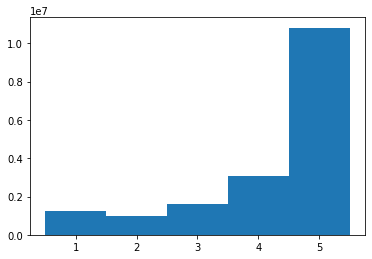

In [ ]:
plt.hist(ratings['overall'], bins=np.arange(1, 7), align='left')

In [ ]:
items_avg_rating = ratings.groupby('asin')['overall'].mean()
items_avg_rating

asin
1519588135    4.008097
1579652956    4.480000
3979050432    4.204724
5120053017    3.626374
5120053084    4.624277
                ...   
B01HJCZ02O    4.240310
B01HJD4BBE    4.375000
B01HJDVCJI    4.114286
B01HJDZM30    4.806452
B01HJHFS58    4.127273
Name: overall, Length: 147533, dtype: float64

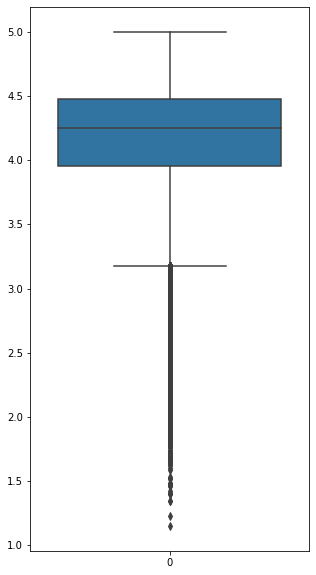

In [ ]:
plt.figure(figsize=(5,10))
sns.boxplot(data=items_avg_rating)

In [ ]:
reviews_count_per_day = ratings.groupby('reviewDate')['overall'].agg('count')

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text major ticklabel objects>)

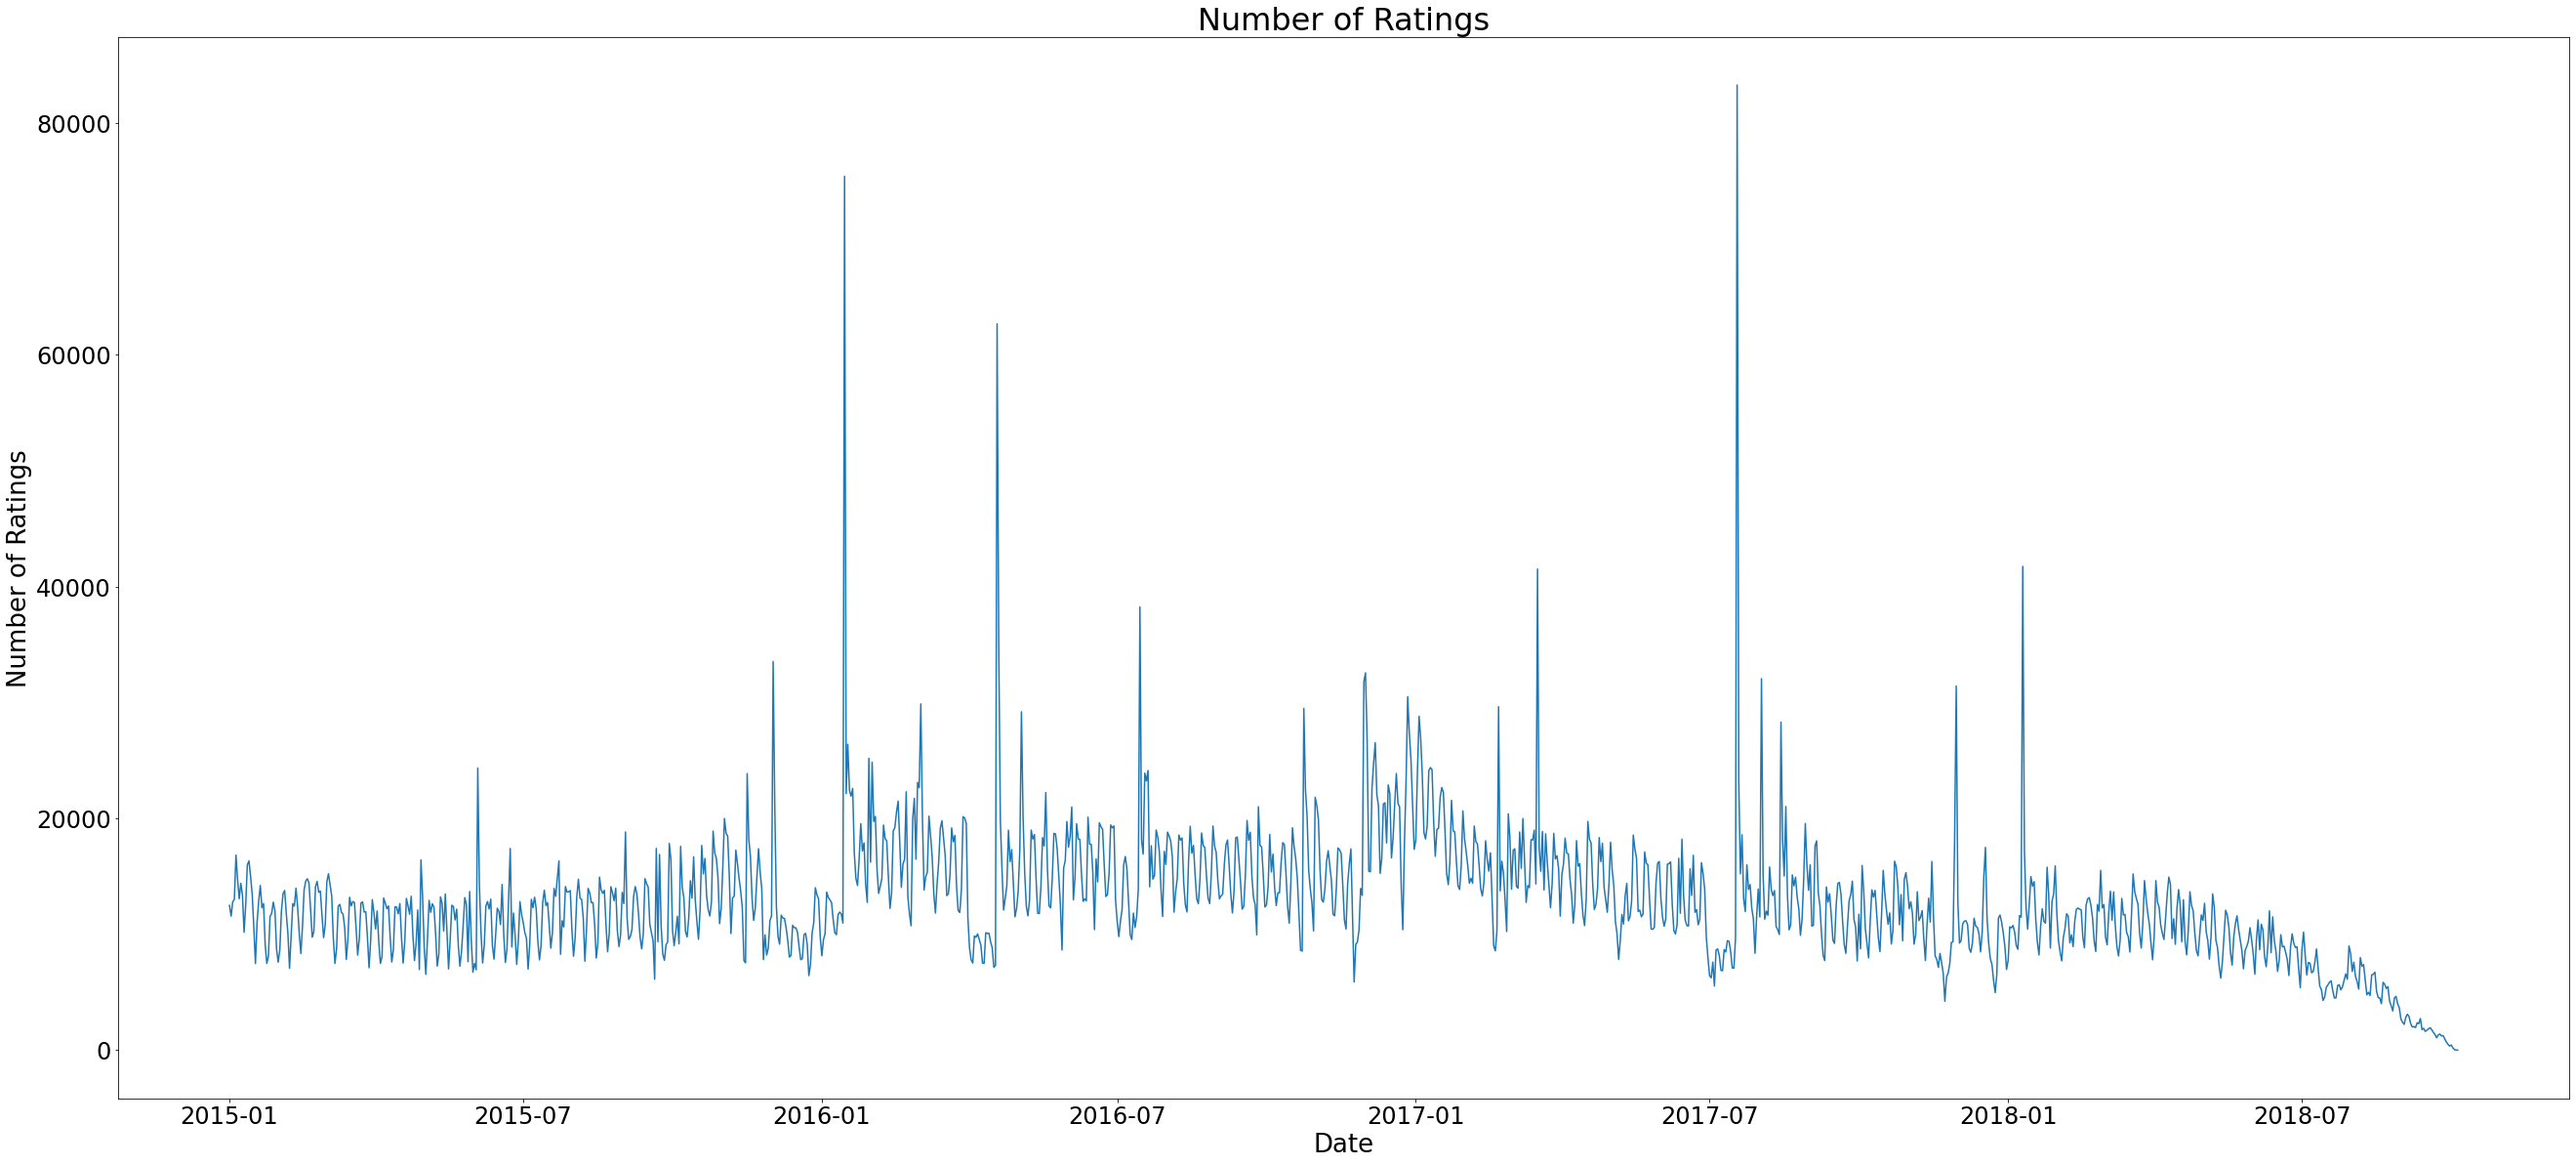

In [ ]:
plt.figure(figsize=(45,20))
plt.plot(reviews_count_per_day, animated=True)
plt.title('Number of Ratings', fontsize=32)
plt.xlabel('Date', fontsize=26)
plt.xticks(fontsize=24)
plt.ylabel('Number of Ratings', fontsize=26)
plt.yticks(fontsize=24)

In [ ]:
reviews_count_per_day.sort_values(ascending=False)

reviewDate
2017-07-18    83254
2016-01-15    75378
2016-04-18    62654
2018-01-10    41728
2017-03-17    41503
              ...  
2018-09-30      354
2018-10-02      203
2018-10-03       42
2018-10-04       11
2018-10-05        1
Name: overall, Length: 1374, dtype: int64

In [ ]:
SUSPECIOUS_DATE = '2017-07-18'

In [ ]:
peak_reviews_items = ratings[ratings['reviewDate'] == SUSPECIOUS_DATE]['asin'].unique()
len(peak_reviews_items)

33182

In [ ]:
ratings[ratings['reviewDate'] == SUSPECIOUS_DATE].groupby('asin').agg('count')['overall'].sort_values(ascending=False)

asin
B00Y4HQA0O    116
B00IYAG7DW    110
B00OD9JH6W    110
B00V3MYAZA     99
B008KK1AZQ     98
             ... 
B00M6FQZYM      1
B00M6B39QS      1
B00M5MN4IG      1
B00M4YC59E      1
B01HJHFS58      1
Name: overall, Length: 33182, dtype: int64

In [ ]:
peak_reviews_reviewers = ratings[ratings['reviewDate'] == SUSPECIOUS_DATE]['reviewerID'].unique()
len(peak_reviews_reviewers)

66866

In [ ]:
ratings[ratings['reviewDate'] == SUSPECIOUS_DATE].groupby('reviewerID').agg('count')['overall'].sort_values(ascending=False)

reviewerID
A2HWCL8Q0AV67V    43
A1WC0GBB5HDLSL    42
A26ZPI8QGHQ3P2    41
A38GGPHT1UHY7     26
A1X0R2HE02EA1P    25
                  ..
A2D9WV3Q5XCJW8     1
A2D9X1Y2C79UI8     1
A2D9ZNDBVJ0LV0     1
A2DA07DG3EAQXT     1
AZZXD8BZ2GP00      1
Name: overall, Length: 66866, dtype: int64

In [ ]:
peak_reviews_ratings = ratings[ratings['reviewDate'] == SUSPECIOUS_DATE]['overall'].value_counts()
peak_reviews_ratings

5.0    52792
4.0    15084
3.0     7072
1.0     4390
2.0     3916
Name: overall, dtype: int64

In [ ]:
from google.colab import  drive

drive.mount('/drive')

ratings.to_csv('/drive/My Drive/Datasets/amazon_fashion/clothing_shoes_jewelry_ratings_cleaned.csv', index=False)

Mounted at /drive
